In [2]:
import pandas as pd
info = pd.read_table('test_data2.txt', sep = '|')

Dataset has insufficient columns (header has 14 columns, while all other rows have 15 columns). As such cannot be read in as a pandas dataframe immediately.

In [3]:
info2 = open('test_data2.txt').read()
info2_list = info2.split('\n')
new_list =[]
for list in info2_list:
    list = list.split('|')
    new_list.append(list)

new_list[0].append("extra")

In [4]:
df = pd.DataFrame(new_list[1:], columns = new_list[0])
df.columns = ['ACCOUNT_NUM', 'DIVISION_CD', 'OWNER_NAME1', 'OWNER_NAME2',
       'EXCLUDE_OWNER', 'OWNER_ADDRESS_LINE1', 'OWNER_ADDRESS_LINE2',
       'OWNER_ADDRESS_LINE3', 'OWNER_CITY', 'OWNER_STATE', 'LEGAL4',
       'PHONE_NUM', 'extra', 'LAND_VAL', 'TOT_VAL']


In [5]:
df = df.ix[:100000]

In [6]:
len(df[df['extra'] != ''])

0

In [7]:
df = df.drop('extra', axis = 1)

Numeric data can not be read in as float. Some of the numeric values are wrapped within a second pair of quotes.

In [8]:
df['TOT_VAL'] = df['TOT_VAL'].apply(lambda x : float(x.strip('"')))

In [9]:
df['LAND_VAL'] = df['LAND_VAL'].str.strip('"')
df['LAND_VAL'] = df['LAND_VAL'].astype(float)

In [10]:
df

,ACCOUNT_NUM,DIVISION_CD,OWNER_NAME1,OWNER_NAME2,EXCLUDE_OWNER,OWNER_ADDRESS_LINE1,OWNER_ADDRESS_LINE2,OWNER_ADDRESS_LINE3,OWNER_CITY,OWNER_STATE,LEGAL4,PHONE_NUM,LAND_VAL,TOT_VAL
0,00000351712000000,RES,ULATOWSKA H K,,N,,4422 WILDWOOD RD,,DALLAS,TEXAS,CO-DALLAS,,647500,732020
1,00000372289000000,RES,LOWERS PAUL J & ALEXANDRA W,,N,,8566 EUSTIS AVE,,DALLAS,TEXAS,INT201200105080 DD03232012 CO-DC,,160430,229580
2,00000369250000000,RES,GLOVER E P JR,,N,,1216 LOS ALTOS LN,,DUNCANVILLE,TEXAS,INT201200065422 DD01302012 CO-DC,,110000,164380
3,00C61680000000316,RES,AERC RIENZI LLC,,N,ATTN: GENERAL COUNSEL,1 AEC PKWY,,RICHMOND HEIGHTS,OHIO,INT201300307600 DD09272013 CO-DC,,17390,227760
4,00000381097000000,RES,CASTILLO VINCENT A,,N,,10505 SINCLAIR AVE,,DALLAS,TEXAS,VOL2003247/1772 DD12102003 CO-DC,,66000,247850
5,00C61680000000311,RES,AERC RIENZI LLC,,N,ATTN: GENERAL COUNSEL,1 AEC PKWY,,RICHMOND HEIGHTS,OHIO,INT201300307600 DD09272013 CO-DC,,22470,291180
6,99130115670000000,BPP,PRAYER CENTER,,N,,SUITE 330,2525 ROYAL LN,DALLAS,TEXAS,,2144179269,0,2380
7,99140128290000000,BPP,RITZ DAVID M,,N,,SUITE 110,3624 OAK ALWN AVE,DALLAS,TEXAS,,,0,630
8,00000414683630000,RES,CURTIS RENEE MARIE,,N,,10737 VILLAGER RD APT C,,DALLAS,TEXAS,VOL2002161/8410 DD08142002 CO-DC,,37570,147960
9,00000389863000000,RES,GUZMAN ANGEL ESTRADA,,N,,2256 TEALFORD,,DALLAS,TEXAS,INT201400296965 DD09122014 CO-DC,,15000,59960


In [11]:
df.describe()

,LAND_VAL,TOT_VAL
count,1.000010e+05,1.000010e+05
mean,7.476185e+04,2.425177e+05
std,6.268923e+05,1.726698e+06
min,0.000000e+00,1.000000e+01
25%,9.050000e+03,4.230000e+04
50%,2.185000e+04,9.915000e+04
75%,5.000000e+04,2.236300e+05
max,1.354939e+08,2.749122e+08


Land Value: mean > median 
Total Value: mean > median

I suspect few properties with very large value and many properties with very small value.

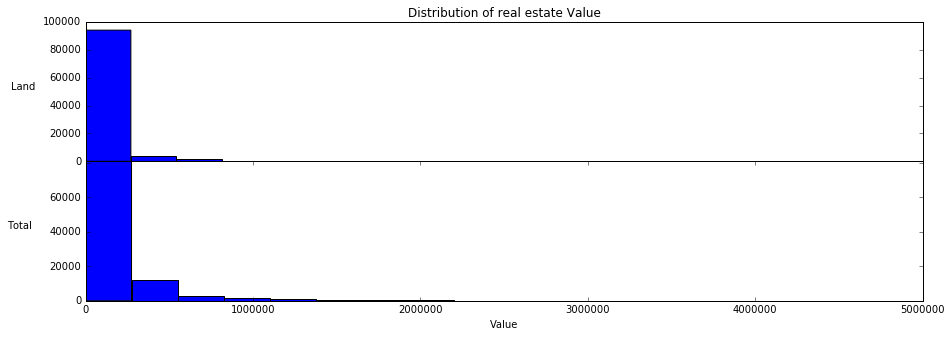

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.figure(figsize = (15,5)).add_subplot(211).set(xlim = (0,0.5*10**7), title = 'Distribution of real estate Value')
plt.hist(df['LAND_VAL'], bins = 500)
plt.subplot(211).get_xaxis().set_visible(False)
plt.subplot(211).set_ylabel('Land', rotation = 0, labelpad = 20)

plt.subplot(212).set(xlim = (0,0.5*10**7), xlabel = 'Value')
plt.subplot(212).set_ylabel('Total', rotation = 0, labelpad = 30)
plt.subplot(212).set_yticks(np.arange(0,100000,20000))
plt.subplot(212).set_yticklabels([20000*i for i in range(4)])

plt.hist(df['TOT_VAL'], bins = 1000)

plt.subplots_adjust(hspace = 0)

Most of the property values are less than 300,000 dollars. Property values decrease exponentially.

In [13]:
states = df['OWNER_STATE'].value_counts()
states.head(3)

TEXAS         95604
CALIFORNIA     1264
DELAWARE        330
Name: OWNER_STATE, dtype: int64

C:\Users\DELL1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:492: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


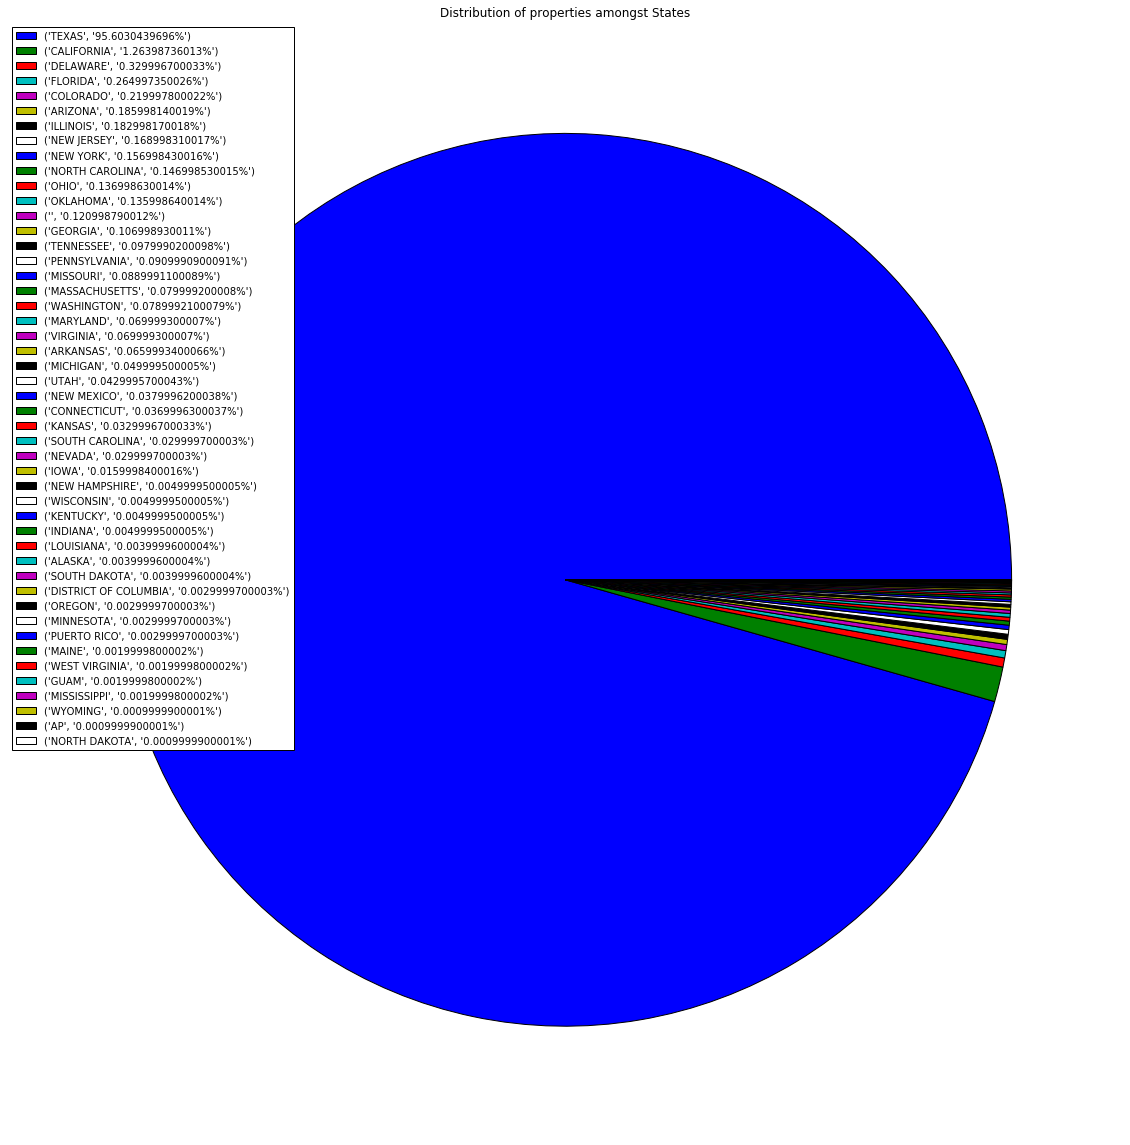

In [14]:
states_percent = 100*states / states.sum()
plt.figure(figsize = (20,20))
plt.title('Distribution of properties amongst States')
plt.pie(states_percent)
labels = [(i,str(j) + '%') for i,j in zip(states.index, states_percent)]
plt.legend(states.index, labels = labels, loc = 'upper left', fontsize = 10)

plt.show()

Most of this database is comprised of Texan properties.

In [15]:
property_mean = pd.pivot_table(df, values = ['TOT_VAL','LAND_VAL'], columns = 'OWNER_STATE', aggfunc = np.mean).drop('', axis = 1)
property_mean

OWNER_STATE,ALASKA,AP,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,...,SOUTH CAROLINA,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
LAND_VAL,13492.5,0,66403.440860,72550.909091,38716.780063,71881.0,43902.702703,8296.030303,116720.000000,44870.075472,...,26487.333333,14430.0,67064.591837,76363.209280,62871.162791,33101.571429,26729.493671,5070,13916,0
TOT_VAL,119472.5,117000,226854.139785,658520.757576,375744.699367,320111.5,3189799.189189,19759.060606,178916.666667,482174.113208,...,107121.666667,61182.5,742774.591837,231483.029999,218941.860465,342986.142857,2751708.607595,243280,1081292,5000


In [16]:
property_mean.idxmax(axis = 1)

LAND_VAL           GUAM
TOT_VAL     CONNECTICUT
dtype: object

Connecticut has highest average property value. Guam has highest average land value. 

In [17]:
property_sum = pd.pivot_table(df, values = ['TOT_VAL','LAND_VAL'], columns = 'OWNER_STATE', aggfunc = np.sum).drop('', axis = 1)
property_sum

OWNER_STATE,ALASKA,AP,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,...,SOUTH CAROLINA,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
LAND_VAL,53970,0,12351040,4788360,48938010,15813820,1624400,2737690,350160,11890570,...,794620,57720,6572330,7300628260,2703460,2317110,2111630,10140,69580,0
TOT_VAL,477890,117000,42194870,43462370,474941300,70424530,118022570,6520490,536750,127776140,...,3213650,244730,72791910,22130703600,9414500,24009030,217384980,486560,5406460,5000


In [18]:
property_sum.idxmax(axis = 1)

LAND_VAL    TEXAS
TOT_VAL     TEXAS
dtype: object

Texas has highest sum of property value in database, over 22 trillion dollars worth!

In [19]:
df.columns

Index(['ACCOUNT_NUM', 'DIVISION_CD', 'OWNER_NAME1', 'OWNER_NAME2',
       'EXCLUDE_OWNER', 'OWNER_ADDRESS_LINE1', 'OWNER_ADDRESS_LINE2',
       'OWNER_ADDRESS_LINE3', 'OWNER_CITY', 'OWNER_STATE', 'LEGAL4',
       'PHONE_NUM', 'LAND_VAL', 'TOT_VAL'],
      dtype='object')

In [20]:
df[['ACCOUNT_NUM', 'DIVISION_CD', 'OWNER_NAME1', 'OWNER_NAME2',
       'EXCLUDE_OWNER', 'OWNER_ADDRESS_LINE1', 'OWNER_ADDRESS_LINE2',
       'OWNER_ADDRESS_LINE3', 'OWNER_CITY', 'OWNER_STATE', 'LEGAL4',
       'PHONE_NUM']].describe()

,ACCOUNT_NUM,DIVISION_CD,OWNER_NAME1,OWNER_NAME2,EXCLUDE_OWNER,OWNER_ADDRESS_LINE1,OWNER_ADDRESS_LINE2,OWNER_ADDRESS_LINE3,OWNER_CITY,OWNER_STATE,LEGAL4,PHONE_NUM
count,100001,100001,100001,100001,100001,100001,100001,100001,100001,100001,100001,100001
unique,100001,3,88661,8,2,19955,73071,10709,1382,48,73239,12432
top,00000361207000000,RES,DALLAS & FT WORTH CITIES,,N,,,,DALLAS,TEXAS,,
freq,1,80434,305,99993,99880,73515,7274,82833,59614,95604,19002,85894


88,661 unique owner names. The name DALLAS & FT WORTH CITIES appears 305 times (more than any other name). Dallas most common city with 59614 appearences. 48 unique states appear in database, as well as 1382 unique cities and 73239 unique legal discription info. The most common property types are residential properties, with 80434 in the database. Every single account number is unique.

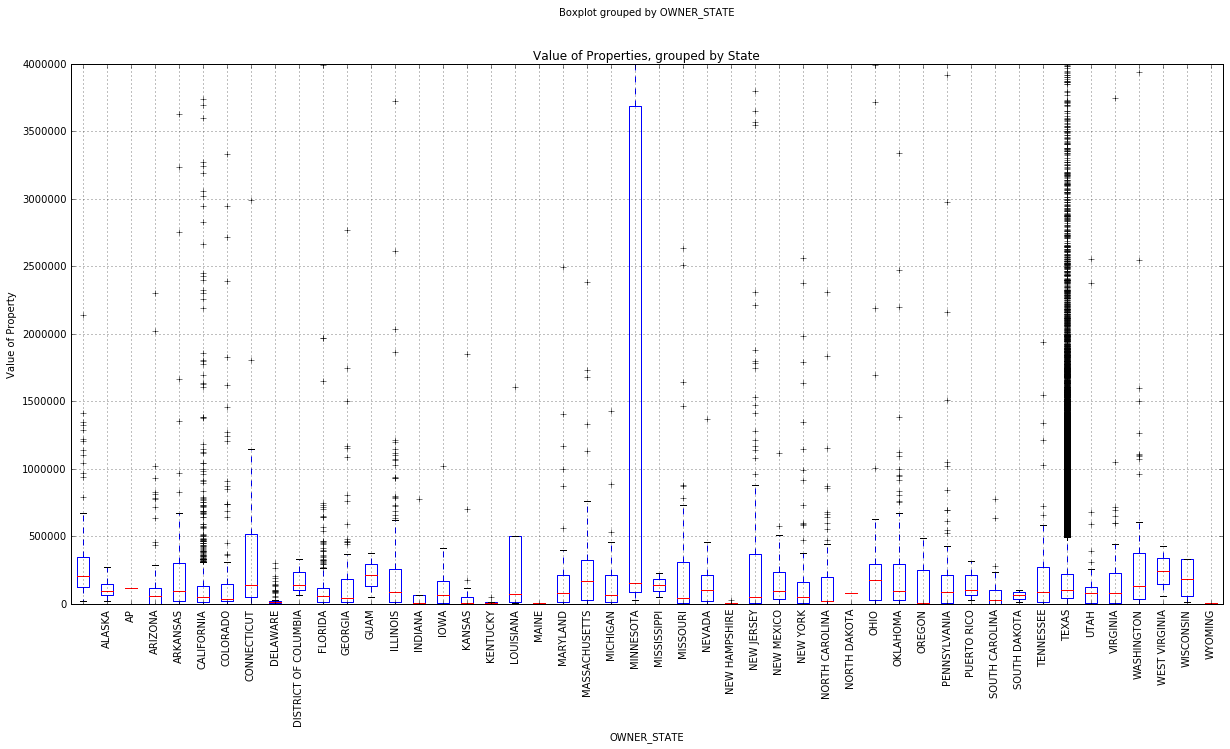

In [21]:
df.boxplot(column = 'TOT_VAL', by = 'OWNER_STATE', figsize = (20,10)).set(ylabel = 'Value of Property',
                                                                          ylim = (0,0.4*10**7), title = 'Value of Properties, grouped by State')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.show()

Minnesota has largest bulk of valuable properties as a percentage of the total Minnesota properties in database. After them Louisiana and Connecticut. Texas as a whole has more valuable properties, but the large bulk of the properties as a percentage are low value properties.

In [22]:
df['OWNER_NAME1'].value_counts().head(10)

DALLAS & FT WORTH CITIES    305
HP ACQUISITON LLC           300
PRICE LONDON PARK           221
CAPA PARTNERS LTD           148
DALLAS CITY OF              139
9387 PINYON TREE LN LLC     130
MEADOWSTONE LIMITED         126
SHADY OAKS TB LTD           122
                            121
STEVENS VILLAGE COUNTRY     116
Name: OWNER_NAME1, dtype: int64

In [23]:
np.corrcoef(df['LAND_VAL'], df['TOT_VAL'])[0,1]

0.52414827011210496

Strong positive correlation between land and property value, perhaps not as strong as expected. This would be an interesting issue to further investigate.

In [24]:
by_state = df.set_index('OWNER_STATE', drop = False)

In [25]:
ser = pd.Series()
for state in by_state['OWNER_STATE'].unique():
    corr = np.corrcoef(by_state.loc[state, 'LAND_VAL'],by_state.loc[state, 'TOT_VAL'])[0,1]
    ser.set_value(state, corr)
    
ser

C:\Users\DELL1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2079: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


TEXAS                   0.584177
OHIO                    0.209124
KANSAS                  0.006473
ILLINOIS                0.526293
                        0.835776
COLORADO                0.598533
CALIFORNIA              0.499180
NEW YORK                0.159048
OKLAHOMA                0.268095
PENNSYLVANIA            0.117242
TENNESSEE               0.256973
NORTH CAROLINA         -0.051156
MARYLAND                0.969353
WASHINGTON             -0.038032
MICHIGAN               -0.042310
ARKANSAS                0.674182
NEVADA                  0.984006
FLORIDA                 0.455545
ARIZONA                 0.653115
NEW JERSEY              0.004694
GEORGIA                 0.573339
DELAWARE                0.442707
UTAH                    0.822189
NEW MEXICO              0.385563
VIRGINIA                0.306211
WISCONSIN              -0.246400
LOUISIANA               0.997373
MISSOURI               -0.009740
MASSACHUSETTS           0.764487
MISSISSIPPI             1.000000
CONNECTICU

Specific states have very low correlation coefficient. This is probably due to very small number of properties in state. This is probably what is causing our correlation coefficient to be biased. In future exclude states with small amount of properties before conducting correlation matrix. That being said, our "not as strong as expected" correlation from a few lines up is probably due to the fact that land in certain states and cities is very cheap while land in other states and cities is very expensive, this coupled with a more or less standard building cost would cause our correlation coefficient between land value and property value to be pulled downwards. The more we isolate geographic factors the more likely correlation is to go up between these two values.

In [26]:

df['Location'] = df['OWNER_ADDRESS_LINE2'] + " " + df['OWNER_ADDRESS_LINE3'] + " " + df['OWNER_CITY']
df

,ACCOUNT_NUM,DIVISION_CD,OWNER_NAME1,OWNER_NAME2,EXCLUDE_OWNER,OWNER_ADDRESS_LINE1,OWNER_ADDRESS_LINE2,OWNER_ADDRESS_LINE3,OWNER_CITY,OWNER_STATE,LEGAL4,PHONE_NUM,LAND_VAL,TOT_VAL,Location
0,00000351712000000,RES,ULATOWSKA H K,,N,,4422 WILDWOOD RD,,DALLAS,TEXAS,CO-DALLAS,,647500,732020,4422 WILDWOOD RD DALLAS
1,00000372289000000,RES,LOWERS PAUL J & ALEXANDRA W,,N,,8566 EUSTIS AVE,,DALLAS,TEXAS,INT201200105080 DD03232012 CO-DC,,160430,229580,8566 EUSTIS AVE DALLAS
2,00000369250000000,RES,GLOVER E P JR,,N,,1216 LOS ALTOS LN,,DUNCANVILLE,TEXAS,INT201200065422 DD01302012 CO-DC,,110000,164380,1216 LOS ALTOS LN DUNCANVILLE
3,00C61680000000316,RES,AERC RIENZI LLC,,N,ATTN: GENERAL COUNSEL,1 AEC PKWY,,RICHMOND HEIGHTS,OHIO,INT201300307600 DD09272013 CO-DC,,17390,227760,1 AEC PKWY RICHMOND HEIGHTS
4,00000381097000000,RES,CASTILLO VINCENT A,,N,,10505 SINCLAIR AVE,,DALLAS,TEXAS,VOL2003247/1772 DD12102003 CO-DC,,66000,247850,10505 SINCLAIR AVE DALLAS
5,00C61680000000311,RES,AERC RIENZI LLC,,N,ATTN: GENERAL COUNSEL,1 AEC PKWY,,RICHMOND HEIGHTS,OHIO,INT201300307600 DD09272013 CO-DC,,22470,291180,1 AEC PKWY RICHMOND HEIGHTS
6,99130115670000000,BPP,PRAYER CENTER,,N,,SUITE 330,2525 ROYAL LN,DALLAS,TEXAS,,2144179269,0,2380,SUITE 330 2525 ROYAL LN DALLAS
7,99140128290000000,BPP,RITZ DAVID M,,N,,SUITE 110,3624 OAK ALWN AVE,DALLAS,TEXAS,,,0,630,SUITE 110 3624 OAK ALWN AVE DALLAS
8,00000414683630000,RES,CURTIS RENEE MARIE,,N,,10737 VILLAGER RD APT C,,DALLAS,TEXAS,VOL2002161/8410 DD08142002 CO-DC,,37570,147960,10737 VILLAGER RD APT C DALLAS
9,00000389863000000,RES,GUZMAN ANGEL ESTRADA,,N,,2256 TEALFORD,,DALLAS,TEXAS,INT201400296965 DD09122014 CO-DC,,15000,59960,2256 TEALFORD DALLAS


In [27]:
df = df.set_index('Location', drop = False)
df

,ACCOUNT_NUM,DIVISION_CD,OWNER_NAME1,OWNER_NAME2,EXCLUDE_OWNER,OWNER_ADDRESS_LINE1,OWNER_ADDRESS_LINE2,OWNER_ADDRESS_LINE3,OWNER_CITY,OWNER_STATE,LEGAL4,PHONE_NUM,LAND_VAL,TOT_VAL,Location
Location,,,,,,,,,,,,,,,
4422 WILDWOOD RD DALLAS,00000351712000000,RES,ULATOWSKA H K,,N,,4422 WILDWOOD RD,,DALLAS,TEXAS,CO-DALLAS,,647500,732020,4422 WILDWOOD RD DALLAS
8566 EUSTIS AVE DALLAS,00000372289000000,RES,LOWERS PAUL J & ALEXANDRA W,,N,,8566 EUSTIS AVE,,DALLAS,TEXAS,INT201200105080 DD03232012 CO-DC,,160430,229580,8566 EUSTIS AVE DALLAS
1216 LOS ALTOS LN DUNCANVILLE,00000369250000000,RES,GLOVER E P JR,,N,,1216 LOS ALTOS LN,,DUNCANVILLE,TEXAS,INT201200065422 DD01302012 CO-DC,,110000,164380,1216 LOS ALTOS LN DUNCANVILLE
1 AEC PKWY RICHMOND HEIGHTS,00C61680000000316,RES,AERC RIENZI LLC,,N,ATTN: GENERAL COUNSEL,1 AEC PKWY,,RICHMOND HEIGHTS,OHIO,INT201300307600 DD09272013 CO-DC,,17390,227760,1 AEC PKWY RICHMOND HEIGHTS
10505 SINCLAIR AVE DALLAS,00000381097000000,RES,CASTILLO VINCENT A,,N,,10505 SINCLAIR AVE,,DALLAS,TEXAS,VOL2003247/1772 DD12102003 CO-DC,,66000,247850,10505 SINCLAIR AVE DALLAS
1 AEC PKWY RICHMOND HEIGHTS,00C61680000000311,RES,AERC RIENZI LLC,,N,ATTN: GENERAL COUNSEL,1 AEC PKWY,,RICHMOND HEIGHTS,OHIO,INT201300307600 DD09272013 CO-DC,,22470,291180,1 AEC PKWY RICHMOND HEIGHTS
SUITE 330 2525 ROYAL LN DALLAS,99130115670000000,BPP,PRAYER CENTER,,N,,SUITE 330,2525 ROYAL LN,DALLAS,TEXAS,,2144179269,0,2380,SUITE 330 2525 ROYAL LN DALLAS
SUITE 110 3624 OAK ALWN AVE DALLAS,99140128290000000,BPP,RITZ DAVID M,,N,,SUITE 110,3624 OAK ALWN AVE,DALLAS,TEXAS,,,0,630,SUITE 110 3624 OAK ALWN AVE DALLAS
10737 VILLAGER RD APT C DALLAS,00000414683630000,RES,CURTIS RENEE MARIE,,N,,10737 VILLAGER RD APT C,,DALLAS,TEXAS,VOL2002161/8410 DD08142002 CO-DC,,37570,147960,10737 VILLAGER RD APT C DALLAS


In [28]:
df['Location'].value_counts()

PO BOX 619428  DALLAS                          301
28 OLD RUDNICK LN  DOVER                       300
4125 CENTURION WAY STE 200  ADDISON            223
5530 ALTON AVE  DALLAS                         167
13355 NOEL RD STE 1770  DALLAS                 148
1414 ELM ST STE 200  DALLAS                    139
2016 RIVERSIDE DR  LOS ANGELES                 132
12740 HILLCREST RD STE 205  DALLAS             123
1500 MARILLA ST  DALLAS                        122
                                               121
3500 MAPLE AVE STE 1165  DALLAS                116
9601 FOREST LN  DALLAS                         113
620 ROWLETT RD  GARLAND                        108
2404 TEXAS DR STE 103  IRVING                  107
3225 TURTLE CREEK BLVD  DALLAS                 100
3100 MONTICELLO AVE SUITE 310  DALLAS           98
1800 VALLEY VIEW LN STE 300  FARMERS BRANCH     83
3838 OAK LAWN AVE STE 1500  DALLAS              78
5811 BELT LINE RD  DALLAS                       77
4100 HARRY HINES STE 100  DALLA

In [29]:
df['Location'].unique()

array(['4422 WILDWOOD RD  DALLAS', '8566 EUSTIS AVE  DALLAS',
       '1216 LOS ALTOS LN  DUNCANVILLE', ..., '8502 PARK LN  DALLAS',
       '2712 FALLS DR  DALLAS', '6702 GRADY NIBLO PKWY  DALLAS'], dtype=object)

In [30]:
len(df['Location'].value_counts())

86129

In [31]:
len(df['Location'].unique())

86129

In [ ]:
import difflib as dlb
for location in df['Location'].unique():
    owner_series = df.loc[location, ['OWNER_NAME1', 'LEGAL4']]
    boo = False
    for i in range(owner_series.shape[0]):
        for j in range(i + 1, owner_series.shape[0]):
            if dlb.SequenceMatcher(None, owner_series.ix[i,'OWNER_NAME1'], owner_series.ix[j,'OWNER_NAME1']).ratio() >= 0.85:
                if owner_series.ix[i,'LEGAL4'] != owner_series.ix[j, 'LEGAL4']:
                    df = df.drop(location, axis = 0)
                    boo = True
                    break
        if boo == True:
            break
df    
        

In [ ]:
df.to_csv('output.txt', index = False, sep = '|')